In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('final_jaya.csv', sep=';')

In [3]:
df.count()

Unnamed: 0    1000
sentimen      1000
stemmed       1000
dtype: int64

In [4]:
df.head()

,Unnamed: 0,sentimen,stemmed
0,0,0,terima kasih guna layan moga berkah dan sehat ...
1,1,1,whatsapp dengan tanda centang hijau verified
2,2,0,pribadi dengan tidak beri pin password kata sa...
3,3,0,atau datang kantor cabang bsi dekat dengan baw...
4,4,1,assalamualaikum ramdhani mohon maaf tidak nyam...


In [5]:
df.drop(columns='Unnamed: 0', axis =0)
# df.drop(['Unnamed: 7','Label','Unnamed: 9','Unnamed: 10','Unnamed: 11'], axis=1)

,sentimen,stemmed
0,0,terima kasih guna layan moga berkah dan sehat ...
1,1,whatsapp dengan tanda centang hijau verified
2,0,pribadi dengan tidak beri pin password kata sa...
3,0,atau datang kantor cabang bsi dekat dengan baw...
4,1,assalamualaikum ramdhani mohon maaf tidak nyam...
...,...,...
995,1,serta laku ganti pin password dan kata sandi c...
996,1,email contactus coid akun resmi media sosial b...
997,1,serta laku ganti pin password dan kata sandi c...
998,1,email contactus coid akun resmi media sosial b...


In [6]:
df.sentimen.value_counts()

sentimen
 1    678
 0    199
-1    123
Name: count, dtype: int64

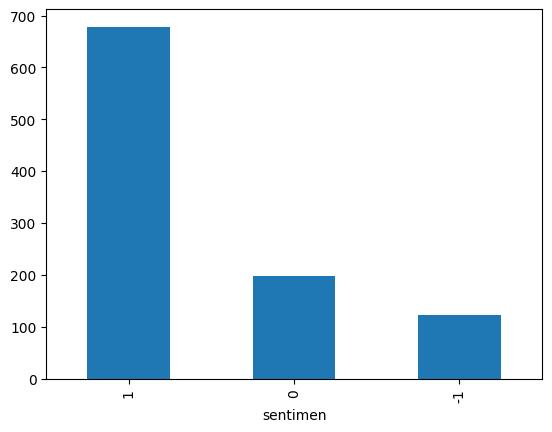

In [7]:
df["sentimen"].value_counts().plot(kind='bar');

# TF-IDF

In [8]:
#Proses TF-IDF Full
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vectorizer = TfidfVectorizer(max_features=5000)
vectors = vectorizer.fit_transform(df.stemmed)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
words_df.head(1000)

tvec = CountVectorizer()
X_cVec = tvec.fit_transform(df['stemmed'].values.astype('U'))
print (X_cVec)
h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(X_cVec)
print(x_tfidf)
X = df.stemmed
Y = df.sentimen

  (0, 1234)	1
  (0, 571)	1
  (0, 427)	1
  (0, 683)	1
  (0, 812)	1
  (0, 169)	1
  (0, 272)	1
  (0, 1088)	1
  (0, 1094)	1
  (0, 1330)	1
  (0, 1345)	1
  (0, 1014)	1
  (0, 355)	1
  (1, 1336)	1
  (1, 293)	1
  (1, 1202)	1
  (1, 241)	1
  (1, 462)	1
  (1, 1309)	1
  (2, 683)	1
  (2, 272)	2
  (2, 293)	1
  (2, 983)	1
  (2, 1249)	1
  (2, 168)	1
  :	:
  (999, 574)	1
  (999, 1066)	1
  (999, 206)	2
  (999, 1116)	1
  (999, 669)	1
  (999, 404)	1
  (999, 229)	1
  (999, 552)	1
  (999, 478)	1
  (999, 1035)	1
  (999, 258)	1
  (999, 242)	1
  (999, 129)	1
  (999, 1190)	1
  (999, 485)	1
  (999, 807)	1
  (999, 781)	1
  (999, 267)	1
  (999, 232)	1
  (999, 226)	1
  (999, 712)	1
  (999, 851)	1
  (999, 701)	1
  (999, 247)	1
  (999, 22)	1
  (0, 1345)	0.2596047700004058
  (0, 1330)	0.25777431012372176
  (0, 1234)	0.24418328162367184
  (0, 1094)	0.28162424258718444
  (0, 1088)	0.29116996205427037
  (0, 1014)	0.5235856496675529
  (0, 812)	0.24991283684000862
  (0, 683)	0.17008801176045668
  (0, 571)	0.2437858200504011

In [9]:
# Ubah hasil output menjadi DataFrame
data_output = pd.DataFrame(x_tfidf.toarray(), columns=tvec.get_feature_names_out())

In [10]:
# Gabungkan DataFrame output dengan data asli (jika diperlukan)
df = pd.concat([df, data_output], axis=1)

In [11]:
# Simpan DataFrame hasil output ke dalam file CSV
data_output.to_csv('tfidf_jaya-benar.csv', index=False)

# Pembagian Data

In [12]:
X = x_tfidf
y = df.sentimen

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Cross-Val data tidak seimbang dan seimbang

 # 2 fold

Fold 1:
              precision    recall  f1-score   support

          -1       0.36      0.33      0.34        61
           0       0.37      0.63      0.46       100
           1       0.82      0.66      0.73       339

    accuracy                           0.61       500
   macro avg       0.52      0.54      0.51       500
weighted avg       0.68      0.61      0.63       500

Confusion Matrix 1:
[[ 20  10  31]
 [ 20  63  17]
 [ 16  99 224]]

Fold 2:
              precision    recall  f1-score   support

          -1       1.00      0.02      0.03        62
           0       0.44      0.40      0.42        99
           1       0.79      0.96      0.87       339

    accuracy                           0.73       500
   macro avg       0.74      0.46      0.44       500
weighted avg       0.75      0.73      0.68       500

Confusion Matrix 2:
[[  1  36  25]
 [  0  40  59]
 [  0  15 324]]



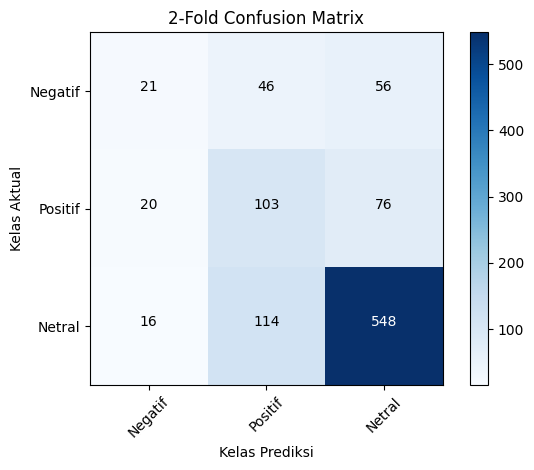

Average Accuracy: 0.6719999999999999
Average Precision: 0.6301049042157114
Average Recall: 0.49909291046646387
Average F1-Score: 0.47643473357116084
Fold 1:
              precision    recall  f1-score   support

          -1       0.33      0.90      0.48        61
           0       0.37      0.46      0.41       100
           1       0.98      0.60      0.74       339

    accuracy                           0.61       500
   macro avg       0.56      0.65      0.54       500
weighted avg       0.78      0.61      0.64       500

Confusion Matrix 1:
[[ 55   5   1]
 [ 51  46   3]
 [ 61  75 203]]

Fold 2:
              precision    recall  f1-score   support

          -1       0.77      0.69      0.73        62
           0       0.50      0.54      0.51        99
           1       0.88      0.88      0.88       339

    accuracy                           0.79       500
   macro avg       0.72      0.70      0.71       500
weighted avg       0.79      0.79      0.79       500

Confus

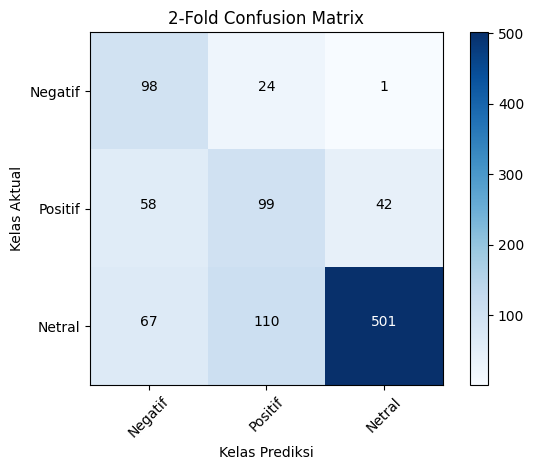

Average Accuracy: 0.698
Average Precision: 0.637092375606762
Average Recall: 0.6780695621512157
Average F1-Score: 0.6263598334683664


In [14]:

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import itertools

%matplotlib inline

kf = StratifiedKFold(n_splits=2)
X_array = x_tfidf.toarray()

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f' if cm.dtype.kind == 'f' else 'd'  # Format as float with 2 decimal places for float values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Kelas Aktual')
    plt.xlabel('Kelas Prediksi')
    plt.tight_layout()

def cross_val(estimator, oversample=False):
    acc = []
    pcs = []
    rec = []
    f1s = []
    total_cm = np.zeros((3, 3))  # Assuming three classes, modify if needed

    for train_index, test_index in kf.split(X_array, Y):
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        if oversample:
            # Apply SMOTE to handle class imbalance in the training set
            smote = SMOTE(random_state=0)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        else:
            X_train_resampled, y_train_resampled = X_train, y_train

        model = estimator.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))
        pcs.append(precision_score(y_test, y_pred, average="macro", zero_division=0))
        rec.append(recall_score(y_test, y_pred, average="macro", zero_division=0))
        f1s.append(f1_score(y_test, y_pred, average="macro", zero_division=0))

        cm = confusion_matrix(y_test, y_pred)
        total_cm += cm

        print(f"Fold {len(acc)}:\n{classification_report(y_test, y_pred, zero_division=0)}")
        print(f"Confusion Matrix {len(acc)}:\n{cm}")
        print('========================================\n')

    # Plot Total Confusion Matrix as an image
    plt.figure()
    plot_confusion_matrix(total_cm, classes=["Negatif", "Positif", "Netral"], title='2-Fold Confusion Matrix')
    plt.show()

    print(f'Average Accuracy: {np.mean(acc)}')
    print(f'Average Precision: {np.mean(pcs)}')
    print(f'Average Recall: {np.mean(rec)}')
    print(f'Average F1-Score: {np.mean(f1s)}')

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Compare performance on imbalanced data (without oversampling)
cross_val(nb, oversample=False)

# Compare performance on balanced data (with oversampling)
cross_val(nb, oversample=True)


# 5 fold

Fold 1:
              precision    recall  f1-score   support

          -1       0.34      0.54      0.42        24
           0       0.34      0.62      0.44        40
           1       0.82      0.54      0.65       136

    accuracy                           0.56       200
   macro avg       0.50      0.57      0.50       200
weighted avg       0.67      0.56      0.58       200

Confusion Matrix 1:
[[13  4  7]
 [ 6 25  9]
 [19 44 73]]

Fold 2:
              precision    recall  f1-score   support

          -1       0.10      0.04      0.06        24
           0       0.57      0.78      0.66        40
           1       0.82      0.82      0.82       136

    accuracy                           0.71       200
   macro avg       0.50      0.54      0.51       200
weighted avg       0.68      0.71      0.69       200

Confusion Matrix 2:
[[  1   4  19]
 [  3  31   6]
 [  6  19 111]]

Fold 3:
              precision    recall  f1-score   support

          -1       0.40      0.16 

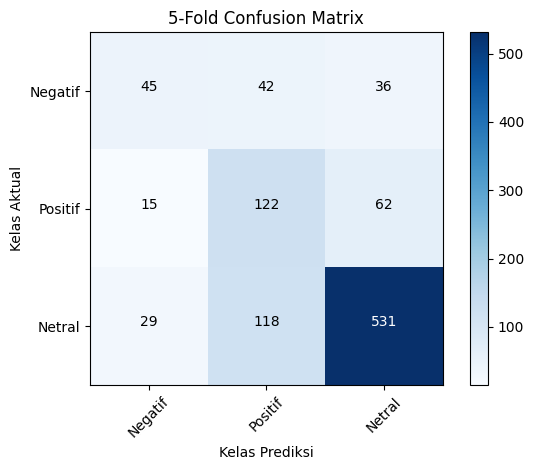

Average Accuracy: 0.698
Average Precision: 0.6033089201229863
Average Recall: 0.5873711524495838
Average F1-Score: 0.5732952682768392
Fold 1:
              precision    recall  f1-score   support

          -1       0.26      0.88      0.40        24
           0       0.45      0.60      0.52        40
           1       0.97      0.48      0.64       136

    accuracy                           0.55       200
   macro avg       0.56      0.65      0.52       200
weighted avg       0.78      0.55      0.59       200

Confusion Matrix 1:
[[21  3  0]
 [14 24  2]
 [45 26 65]]

Fold 2:
              precision    recall  f1-score   support

          -1       0.45      0.92      0.60        24
           0       0.59      0.60      0.59        40
           1       0.99      0.80      0.89       136

    accuracy                           0.78       200
   macro avg       0.68      0.77      0.69       200
weighted avg       0.84      0.78      0.79       200

Confusion Matrix 2:
[[ 22   1 

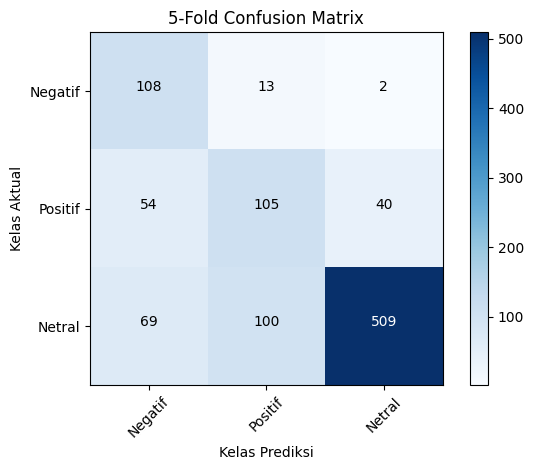

Average Accuracy: 0.7220000000000001
Average Precision: 0.6521219909669754
Average Recall: 0.7193612088710128
Average F1-Score: 0.6552628472402198


In [15]:

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import itertools

%matplotlib inline

kf = StratifiedKFold(n_splits=5)
X_array = x_tfidf.toarray()

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f' if cm.dtype.kind == 'f' else 'd'  # Format as float with 2 decimal places for float values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Kelas Aktual')
    plt.xlabel('Kelas Prediksi')
    plt.tight_layout()

def cross_val(estimator, oversample=False):
    acc = []
    pcs = []
    rec = []
    f1s = []
    total_cm = np.zeros((3, 3))  # Assuming three classes, modify if needed

    for train_index, test_index in kf.split(X_array, Y):
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        if oversample:
            # Apply SMOTE to handle class imbalance in the training set
            smote = SMOTE(random_state=0)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        else:
            X_train_resampled, y_train_resampled = X_train, y_train

        model = estimator.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))
        pcs.append(precision_score(y_test, y_pred, average="macro", zero_division=0))
        rec.append(recall_score(y_test, y_pred, average="macro", zero_division=0))
        f1s.append(f1_score(y_test, y_pred, average="macro", zero_division=0))

        cm = confusion_matrix(y_test, y_pred)
        total_cm += cm

        print(f"Fold {len(acc)}:\n{classification_report(y_test, y_pred, zero_division=0)}")
        print(f"Confusion Matrix {len(acc)}:\n{cm}")
        print('========================================\n')

    # Plot Total Confusion Matrix as an image
    plt.figure()
    plot_confusion_matrix(total_cm, classes=["Negatif", "Positif", "Netral"], title='5-Fold Confusion Matrix')
    plt.show()

    print(f'Average Accuracy: {np.mean(acc)}')
    print(f'Average Precision: {np.mean(pcs)}')
    print(f'Average Recall: {np.mean(rec)}')
    print(f'Average F1-Score: {np.mean(f1s)}')

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Compare performance on imbalanced data (without oversampling)
cross_val(nb, oversample=False)

# Compare performance on balanced data (with oversampling)
cross_val(nb, oversample=True)


# 10 fold

Fold 1:
              precision    recall  f1-score   support

          -1       0.60      0.75      0.67        12
           0       0.27      0.85      0.41        20
           1       0.86      0.28      0.42        68

    accuracy                           0.45       100
   macro avg       0.58      0.63      0.50       100
weighted avg       0.71      0.45      0.45       100

Confusion Matrix 1:
[[ 9  2  1]
 [ 1 17  2]
 [ 5 44 19]]

Fold 2:
              precision    recall  f1-score   support

          -1       1.00      0.33      0.50        12
           0       0.32      0.40      0.36        20
           1       0.76      0.79      0.78        68

    accuracy                           0.66       100
   macro avg       0.69      0.51      0.54       100
weighted avg       0.70      0.66      0.66       100

Confusion Matrix 2:
[[ 4  3  5]
 [ 0  8 12]
 [ 0 14 54]]

Fold 3:
              precision    recall  f1-score   support

          -1       0.50      0.42      0.45

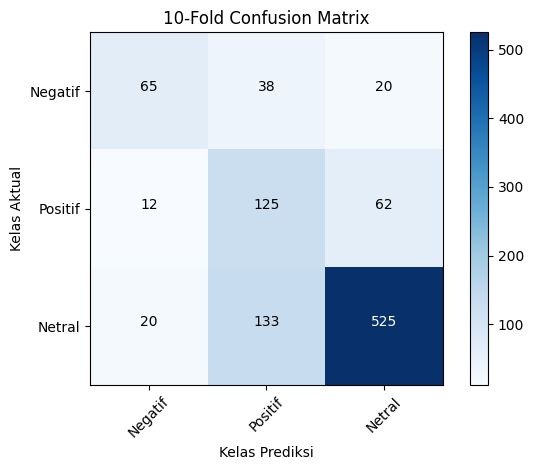

Average Accuracy: 0.7150000000000001
Average Precision: 0.6772720497364094
Average Recall: 0.6425038141830341
Average F1-Score: 0.6306151641932376
Fold 1:
              precision    recall  f1-score   support

          -1       0.20      0.83      0.32        12
           0       0.42      0.75      0.54        20
           1       0.86      0.18      0.29        68

    accuracy                           0.37       100
   macro avg       0.49      0.59      0.38       100
weighted avg       0.69      0.37      0.34       100

Confusion Matrix 1:
[[10  2  0]
 [ 3 15  2]
 [37 19 12]]

Fold 2:
              precision    recall  f1-score   support

          -1       0.39      0.92      0.55        12
           0       0.38      0.30      0.33        20
           1       0.95      0.78      0.85        68

    accuracy                           0.70       100
   macro avg       0.57      0.67      0.58       100
weighted avg       0.77      0.70      0.71       100

Confusion Matrix 

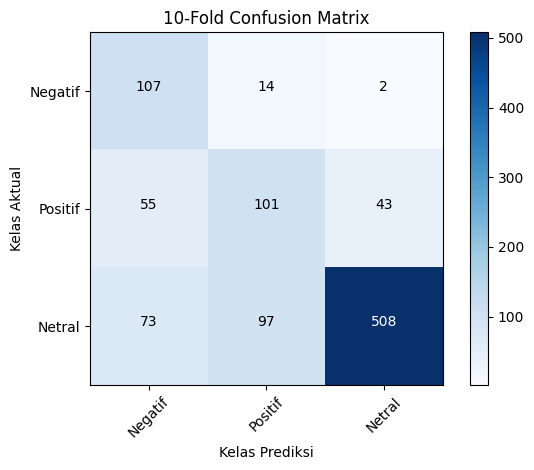

Average Accuracy: 0.716
Average Precision: 0.6479698554179321
Average Recall: 0.7089157254135767
Average F1-Score: 0.6424327942691938


In [16]:

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import itertools

%matplotlib inline

kf = StratifiedKFold(n_splits=10)
X_array = x_tfidf.toarray()

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f' if cm.dtype.kind == 'f' else 'd'  # Format as float with 2 decimal places for float values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Kelas Aktual')
    plt.xlabel('Kelas Prediksi')
    plt.tight_layout()

def cross_val(estimator, oversample=False):
    acc = []
    pcs = []
    rec = []
    f1s = []
    total_cm = np.zeros((3, 3))  # Assuming three classes, modify if needed

    for train_index, test_index in kf.split(X_array, Y):
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        if oversample:
            # Apply SMOTE to handle class imbalance in the training set
            smote = SMOTE(random_state=0)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        else:
            X_train_resampled, y_train_resampled = X_train, y_train

        model = estimator.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))
        pcs.append(precision_score(y_test, y_pred, average="macro", zero_division=0))
        rec.append(recall_score(y_test, y_pred, average="macro", zero_division=0))
        f1s.append(f1_score(y_test, y_pred, average="macro", zero_division=0))

        cm = confusion_matrix(y_test, y_pred)
        total_cm += cm

        print(f"Fold {len(acc)}:\n{classification_report(y_test, y_pred, zero_division=0)}")
        print(f"Confusion Matrix {len(acc)}:\n{cm}")
        print('========================================\n')

    # Plot Total Confusion Matrix as an image
    plt.figure()
    plot_confusion_matrix(total_cm, classes=["Negatif", "Positif", "Netral"], title='10-Fold Confusion Matrix')
    plt.show()

    print(f'Average Accuracy: {np.mean(acc)}')
    print(f'Average Precision: {np.mean(pcs)}')
    print(f'Average Recall: {np.mean(rec)}')
    print(f'Average F1-Score: {np.mean(f1s)}')

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Compare performance on imbalanced data (without oversampling)
cross_val(nb, oversample=False)

# Compare performance on balanced data (with oversampling)
cross_val(nb, oversample=True)


# Confussion Matrix

# SMOTE


In [17]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Buat instance SMOTE
smote = SMOTE(sampling_strategy= 'auto' ,random_state=0)

# Oversampling menggunakan SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

from collections import Counter
print('SMOTE %s' %Counter(y_train_resampled))

SMOTE Counter({0: 543, 1: 543, -1: 543})


In [18]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming you have X_train_resampled, y_train_resampled, X_test_resampled, and y_test_resampled

# Buat instance SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Oversampling menggunakan SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

# Concatenate the training and testing DataFrames
df_resampled = pd.concat([pd.DataFrame(X_train_resampled), pd.Series(y_train_resampled)], axis=1)
df_resampled = pd.concat([df_resampled, pd.DataFrame(X_test_resampled), pd.Series(y_test_resampled)], axis=0)

# Print the counter for the entire resampled dataset
print(Counter(df_resampled.iloc[:, -1]))

# Save the entire resampled dataset to an Excel file
df_resampled.to_excel('resampled_data.xlsx', index=False)


Counter({0.0: 543, 1.0: 543, -1.0: 543, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 

# Cross-val Data Seimbang

# 2 FOLD 

Fold 1:
              precision    recall  f1-score   support

          -1       0.36      0.33      0.34        61
           0       0.37      0.63      0.46       100
           1       0.82      0.66      0.73       339

    accuracy                           0.61       500
   macro avg       0.52      0.54      0.51       500
weighted avg       0.68      0.61      0.63       500

Confusion Matrix 1:
[[ 20  10  31]
 [ 20  63  17]
 [ 16  99 224]]

Fold 2:
              precision    recall  f1-score   support

          -1       1.00      0.02      0.03        62
           0       0.44      0.40      0.42        99
           1       0.79      0.96      0.87       339

    accuracy                           0.73       500
   macro avg       0.74      0.46      0.44       500
weighted avg       0.75      0.73      0.68       500

Confusion Matrix 2:
[[  1  36  25]
 [  0  40  59]
 [  0  15 324]]



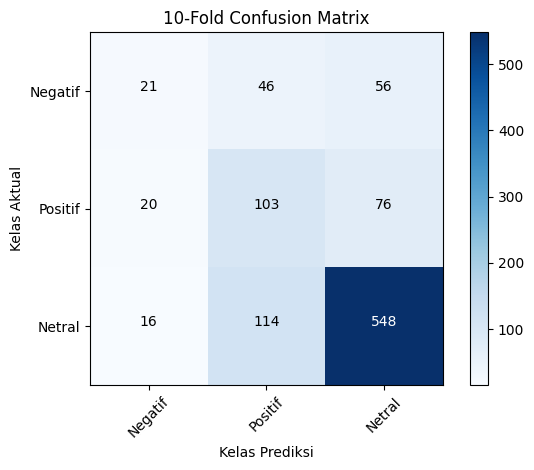

Average Accuracy: 0.6719999999999999
Average Precision: 0.6301049042157114
Average Recall: 0.49909291046646387
Average F1-Score: 0.47643473357116084
Fold 1:
              precision    recall  f1-score   support

          -1       0.33      0.90      0.48        61
           0       0.37      0.46      0.41       100
           1       0.98      0.60      0.74       339

    accuracy                           0.61       500
   macro avg       0.56      0.65      0.54       500
weighted avg       0.78      0.61      0.64       500

Confusion Matrix 1:
[[ 55   5   1]
 [ 51  46   3]
 [ 61  75 203]]

Fold 2:
              precision    recall  f1-score   support

          -1       0.77      0.69      0.73        62
           0       0.50      0.54      0.51        99
           1       0.88      0.88      0.88       339

    accuracy                           0.79       500
   macro avg       0.72      0.70      0.71       500
weighted avg       0.79      0.79      0.79       500

Confus

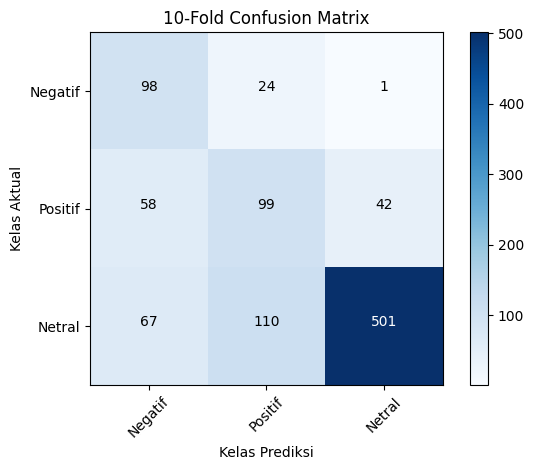

Average Accuracy: 0.698
Average Precision: 0.637092375606762
Average Recall: 0.6780695621512157
Average F1-Score: 0.6263598334683664


In [19]:

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import itertools

%matplotlib inline

kf = StratifiedKFold(n_splits=2)
X_array = x_tfidf.toarray()

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f' if cm.dtype.kind == 'f' else 'd'  # Format as float with 2 decimal places for float values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Kelas Aktual')
    plt.xlabel('Kelas Prediksi')
    plt.tight_layout()

def cross_val(estimator, oversample=False):
    acc = []
    pcs = []
    rec = []
    f1s = []
    total_cm = np.zeros((3, 3))  # Assuming three classes, modify if needed

    for train_index, test_index in kf.split(X_array, Y):
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        if oversample:
            # Apply SMOTE to handle class imbalance in the training set
            smote = SMOTE(random_state=0)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        else:
            X_train_resampled, y_train_resampled = X_train, y_train

        model = estimator.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))
        pcs.append(precision_score(y_test, y_pred, average="macro", zero_division=0))
        rec.append(recall_score(y_test, y_pred, average="macro", zero_division=0))
        f1s.append(f1_score(y_test, y_pred, average="macro", zero_division=0))

        cm = confusion_matrix(y_test, y_pred)
        total_cm += cm

        print(f"Fold {len(acc)}:\n{classification_report(y_test, y_pred, zero_division=0)}")
        print(f"Confusion Matrix {len(acc)}:\n{cm}")
        print('========================================\n')

    # Plot Total Confusion Matrix as an image
    plt.figure()
    plot_confusion_matrix(total_cm, classes=["Negatif", "Positif", "Netral"], title='10-Fold Confusion Matrix')
    plt.show()

    print(f'Average Accuracy: {np.mean(acc)}')
    print(f'Average Precision: {np.mean(pcs)}')
    print(f'Average Recall: {np.mean(rec)}')
    print(f'Average F1-Score: {np.mean(f1s)}')

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Compare performance on imbalanced data (without oversampling)
cross_val(nb, oversample=False)

# Compare performance on balanced data (with oversampling)
cross_val(nb, oversample=True)


## 5 fold

# 10 fold

# Confussion Matrix SMOTE

[[527  16   0]
 [ 28 404 111]
 [ 57  61 425]]
akurasi 0.8324125230202578


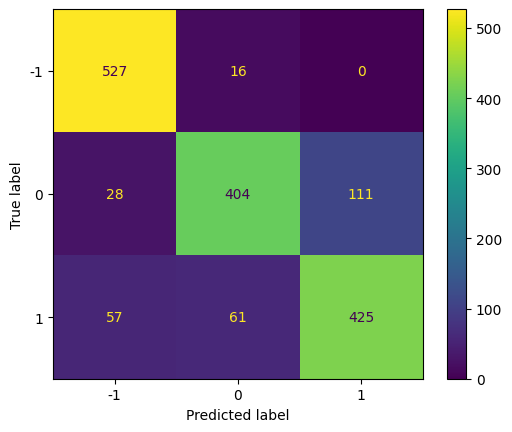

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Create a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions for the test data
y_pred = model.predict(X_train_resampled)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_train_resampled, y_pred)

# Print the confusion matrix
print(confusion_matrix)
acc = accuracy_score(y_train_resampled, y_pred)
print("akurasi", acc)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
disp.plot()
plt.show()